In [3]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
from prophet import Prophet

# Importar las clases
# -----------------------------------------------------------------------
import sys
sys.path.append('..')
from src import soporte_temporales as st

# Configuraciones
# -----------------------------------------------------------------------
pd.options.display.float_format = '{:.0f}'.format
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
df_accidentes = pd.read_csv('..//Datos//datos_accidentes//datos_accidentes_seriet.csv')
df_defunciones = pd.read_csv('..//Datos//datos_defunciones//datos_defunciones_seriet.csv')
df_autos_historicos = pd.read_csv('..//Datos//datos_parquev//parquev_historico.csv')

# Accidentes

In [53]:
df_accidentes.head()

,FECHA,Accidentes
0,2007-01-01,138
1,2007-02-01,125
2,2007-03-01,134
3,2007-04-01,130
4,2007-05-01,108


In [54]:
# instanciamos la clase
analisis_st = st.TimeSeriesAnalysis(df_accidentes, temporal_column="FECHA", value_column="Accidentes")

analisis_st.exploracion_datos()

El número de filas es 204 y el número de columnas es 1

----------

En este conjunto de datos tenemos 126 valores duplicados

----------

No hay valores nulos

----------

Estadísticas de las variables numéricas:


,count,mean,std,min,25%,50%,75%,max
Accidentes,204,139,22,71,125,138,151,195


In [55]:
analisis_st.comprobar_serie_continua()

La serie temporal es continua para la frecuencia 'M', no faltan periodos.


In [56]:
analisis_st.graficar_serie()

In [57]:
analisis_st.graficar_media_movil(window=12)

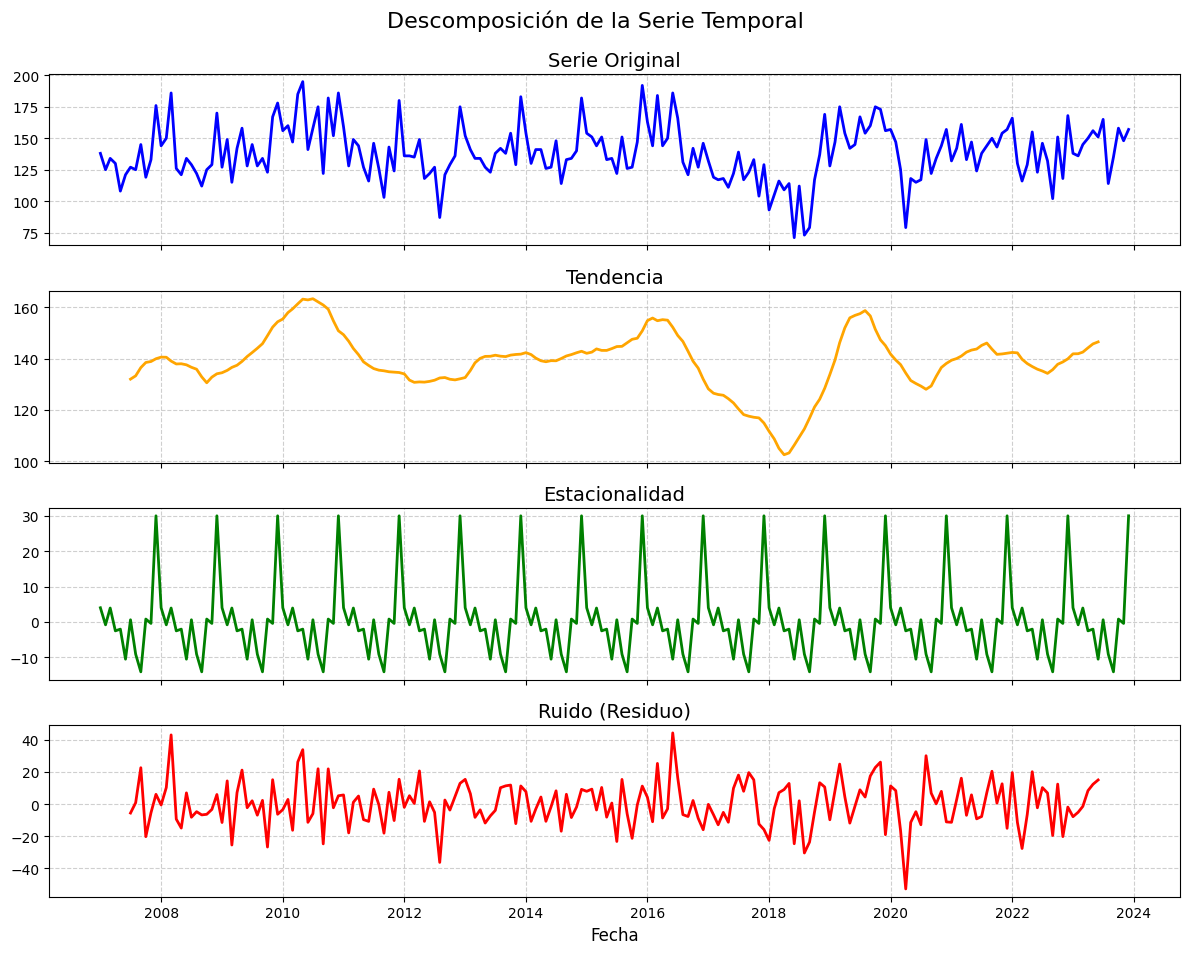

In [58]:
analisis_st.detectar_estacionalidad()

<Figure size 1200x1000 with 0 Axes>

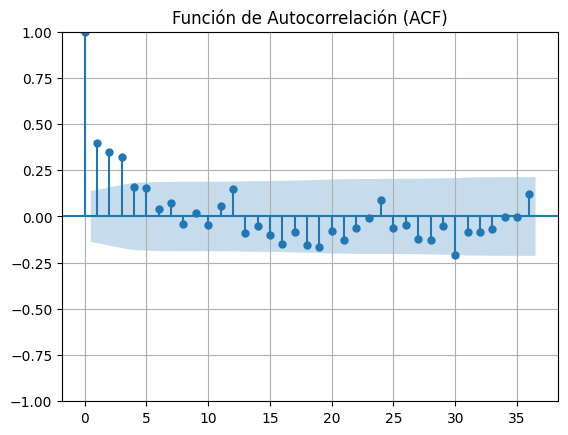

<Figure size 1200x1000 with 0 Axes>

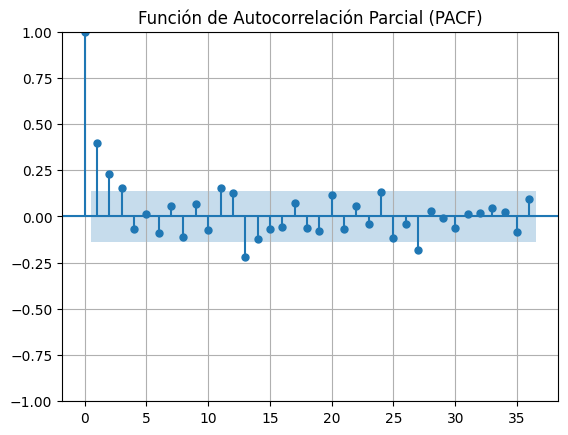

In [59]:
analisis_st.graficar_acf_pacf(lags=36)

In [60]:
analisis_st.prueba_estacionariedad()

ADF Statistic: -3.6373384481895483
p-value: 0.00508603462364682
Valores Críticos:
1%: -3.4652439354133255
5%: -2.8768752281673717
10%: -2.574944653739612
Rechazamos la hipótesis nula. La serie es estacionaria.


# Defunciones

In [28]:
df_defunciones.head()

,FECHA,Defunciones
0,2007-01-01,146
1,2007-02-01,136
2,2007-03-01,156
3,2007-04-01,147
4,2007-05-01,117


In [40]:
df_copia = df_defunciones.copy()
df_copia['FECHA'] = pd.to_datetime(df_copia['FECHA'])
df_copia["Month"] = df_copia["FECHA"].dt.month_name()
df_copia["Year"] = df_copia["FECHA"].dt.year
df_copia.head()

,FECHA,Defunciones,Month,Year
0,2007-01-01,146,January,2007
1,2007-02-01,136,February,2007
2,2007-03-01,156,March,2007
3,2007-04-01,147,April,2007
4,2007-05-01,117,May,2007


In [45]:
# instanciamos la clase
analisis_st = st.TimeSeriesAnalysis(df_copia, temporal_column="FECHA", value_column="Defunciones")

analisis_st.exploracion_datos()

El número de filas es 204 y el número de columnas es 3

----------

No hay duplicados

----------

No hay valores nulos

----------

Estadísticas de las variables numéricas:


,count,mean,std,min,25%,50%,75%,max
Defunciones,204,154,25,77,137,153,169,208
Year,204,2015,5,2007,2011,2015,2019,2023


In [46]:
analisis_st.comprobar_serie_continua()

La serie temporal es continua para la frecuencia 'M', no faltan periodos.


In [48]:
analisis_st.graficar_serie()

In [49]:
analisis_st.graficar_media_movil(window=12)

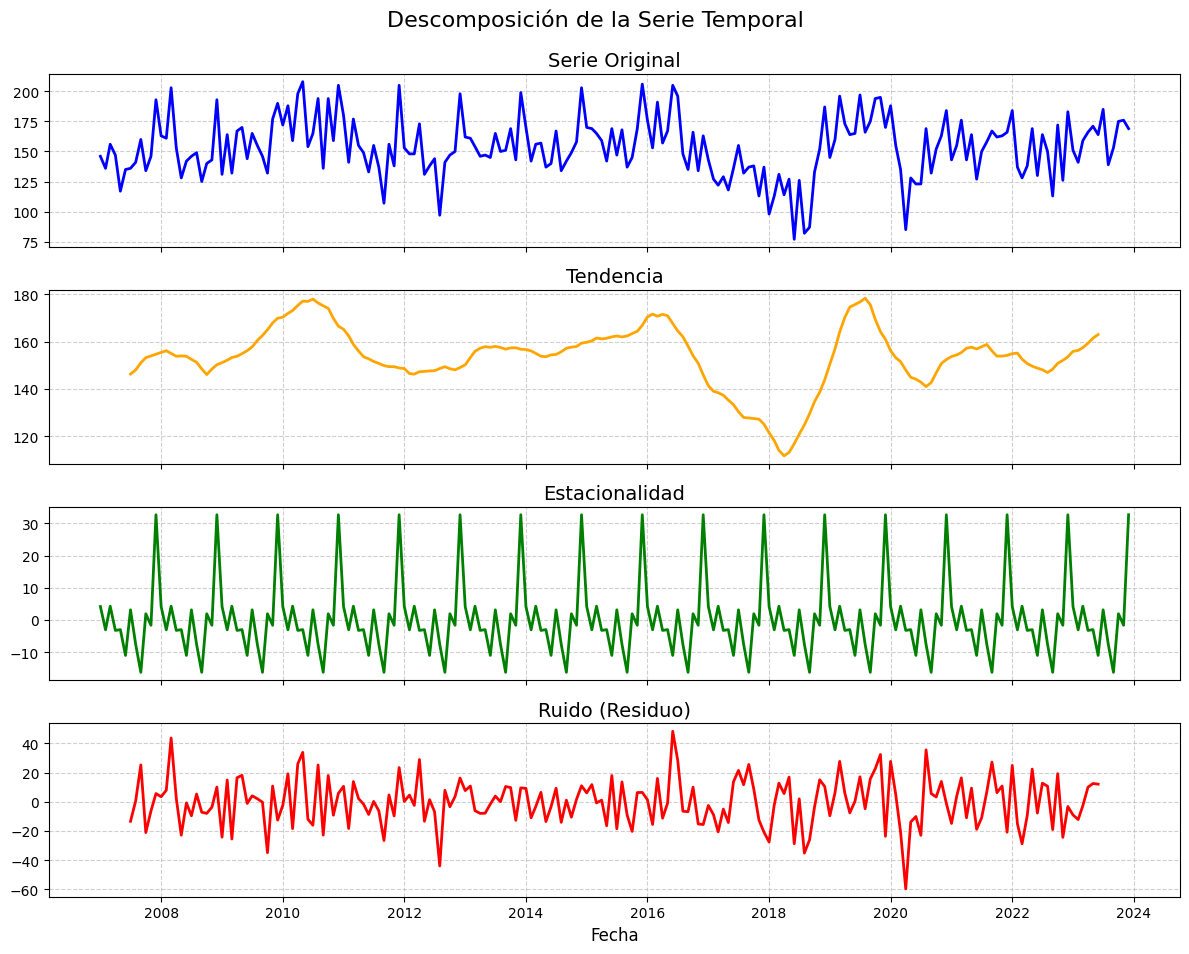

In [50]:
analisis_st.detectar_estacionalidad()

<Figure size 1200x1000 with 0 Axes>

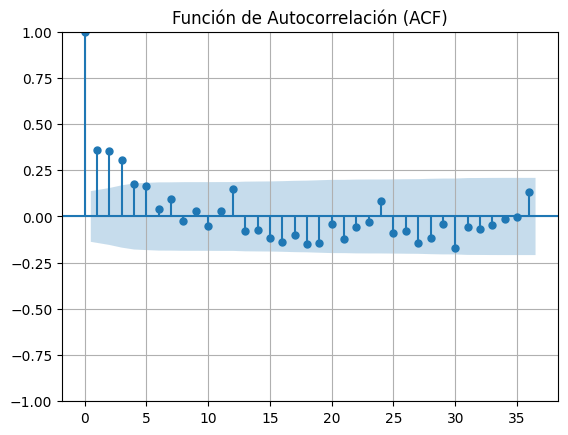

<Figure size 1200x1000 with 0 Axes>

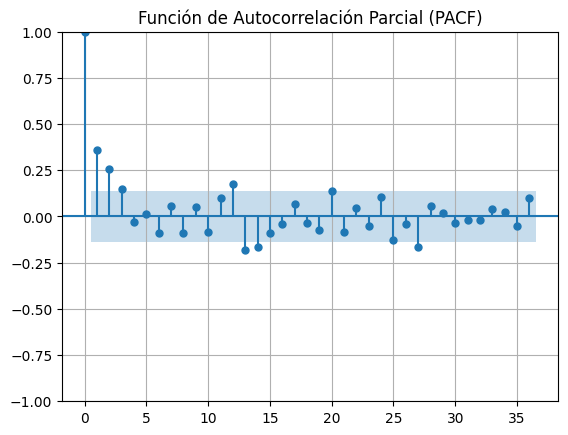

In [51]:
analisis_st.graficar_acf_pacf(lags=36)

In [52]:
analisis_st.prueba_estacionariedad()

ADF Statistic: -3.6734269015355294
p-value: 0.004502839670564938
Valores Críticos:
1%: -3.4652439354133255
5%: -2.8768752281673717
10%: -2.574944653739612
Rechazamos la hipótesis nula. La serie es estacionaria.


# Parque Vehicular

In [76]:
df_autos_historicos.head()

,Anio,Vehículos
0,1999,1090833
1,2000,1294998
2,2001,1436165
3,2002,1611023
4,2003,1680382


In [77]:
df_autos_historicos.columns = ['FECHA', 'Vehículos']
df_autos_historicos['FECHA'] = pd.to_datetime(df_autos_historicos['FECHA'].astype(str) + '-12-01')

In [78]:
df_autos_historicos.head()

,FECHA,Vehículos
0,1999-12-01,1090833
1,2000-12-01,1294998
2,2001-12-01,1436165
3,2002-12-01,1611023
4,2003-12-01,1680382


In [79]:
# instanciamos la clase
analisis_st = st.TimeSeriesAnalysis(df_autos_historicos, temporal_column="FECHA", value_column="Vehículos")

analisis_st.exploracion_datos()

El número de filas es 26 y el número de columnas es 1

----------

No hay duplicados

----------

No hay valores nulos

----------

Estadísticas de las variables numéricas:


,count,mean,std,min,25%,50%,75%,max
Vehículos,26,3202540,1491578,1090833,1918176,2985130,4287498,6160988


In [80]:
analisis_st.comprobar_serie_continua()

La serie temporal NO es continua para la frecuencia 'M'.
Periodos faltantes (M): PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06',
             '2000-07', '2000-08', '2000-09', '2000-10',
             ...
             '2024-02', '2024-03', '2024-04', '2024-05', '2024-06', '2024-07',
             '2024-08', '2024-09', '2024-10', '2024-11'],
            dtype='period[M]', length=275)


In [81]:
analisis_st.graficar_serie()

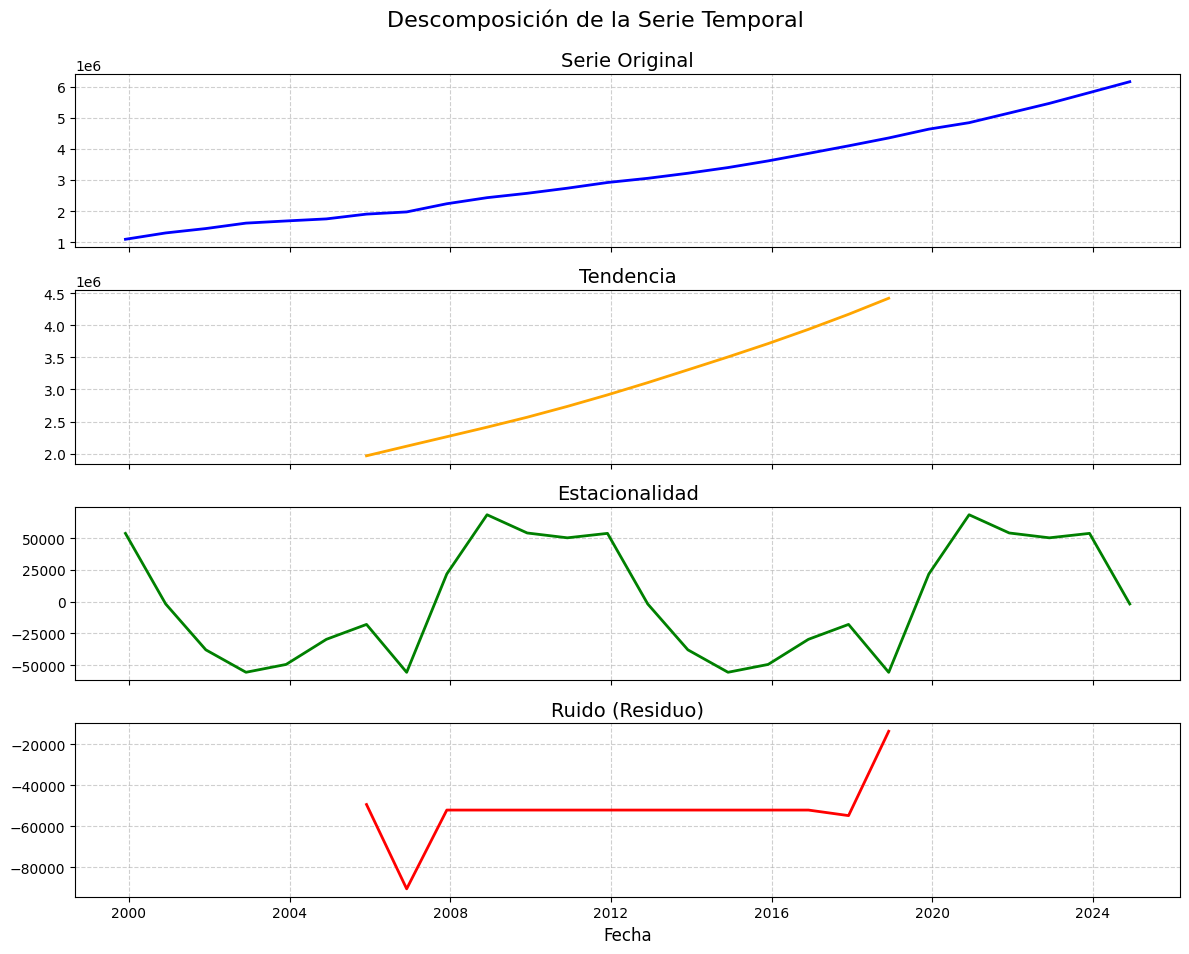

In [83]:
analisis_st.detectar_estacionalidad()

ValueError: could not broadcast input array from shape (26,) into shape (37,)

<Figure size 1200x1000 with 0 Axes>

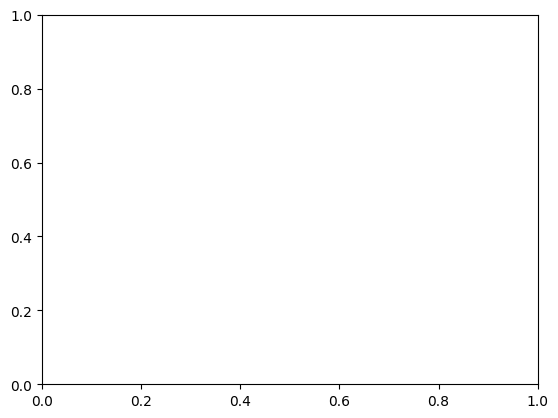

In [84]:
analisis_st.graficar_acf_pacf(lags=36)

In [86]:
analisis_st.prueba_estacionariedad()

ADF Statistic: 6.442312932164075
p-value: 1.0
Valores Críticos:
1%: -3.7238633119999998
5%: -2.98648896
10%: -2.6328004
No podemos rechazar la hipótesis nula. La serie NO es estacionaria.


In [ ]:
m = Prophet()
m.fit(df)  # df is a pandas.DataFrame with 'y' and 'ds' columns
future = m.make_future_dataframe(periods=365)
m.predict(future)